In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

cprd = pd.read_csv('./Resources/coffee_prd_by_country.csv')
cprd.head()

,Continent,Country,"Latitude (-s,n)","Longitude (e,-w)",Production In thousand 60-kg bags 2017,Production In thousand 60-kg bags 2018,Production In thousand 60-kg bags 2019,Production In thousand 60-kg bags 2020
0,Africa,Burundi,-3.37310,29.91890,203,221,268,257
1,Africa,Cameroon,7.36970,12.35470,370,310,268,280
2,Africa,Ivory Coast,7.54000,-5.54710,1624,2175,1929,1775
3,Africa,Democratic Republic of Congo,-4.03833,21.75866,382,397,391,375
4,Africa,Ethiopia,9.14500,40.48970,7347,7511,7343,7375


In [3]:
# print('Rows x Columns : ', cprd.shape[0], 'x', cprd.shape[1])
# print('\nFeatures: ', cprd.columns.tolist())
# print('\nUnique values:')
# print(cprd.nunique())
# for col in cprd.columns:
#     print(col, end=': ')
#     print(cprd[col].unique())
cprd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Continent                               36 non-null     object 
 1   Country                                 36 non-null     object 
 2   Latitude (-s,n)                         36 non-null     float64
 3   Longitude (e,-w)                        36 non-null     float64
 4   Production In thousand 60-kg bags 2017  36 non-null     int64  
 5   Production In thousand 60-kg bags 2018  36 non-null     int64  
 6   Production In thousand 60-kg bags 2019  36 non-null     int64  
 7   Production In thousand 60-kg bags 2020  36 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.4+ KB


In [4]:
cprd.describe()

,"Latitude (-s,n)","Longitude (e,-w)",Production In thousand 60-kg bags 2017,Production In thousand 60-kg bags 2018,Production In thousand 60-kg bags 2019,Production In thousand 60-kg bags 2020
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,7.277860,-4.351854,4650.972222,4718.555556,4672.583333,4762.055556
std,10.634017,75.284139,10868.579922,11434.955078,11353.221834,11791.252193
min,-18.766900,-102.552800,84.000000,54.000000,41.000000,40.000000
25%,-1.049775,-75.706700,330.500000,337.750000,326.500000,328.750000
50%,8.882250,-2.361150,699.000000,704.000000,641.500000,600.000000
75%,15.610400,42.084550,4327.500000,4205.500000,3862.750000,3845.500000
max,23.634500,143.955500,57077.000000,62739.000000,61857.000000,65343.000000


In [5]:
cprd_df = cprd.drop(cprd.columns[2], axis=1)
cprd_df1= cprd_df.drop(cprd_df.columns[2], axis=1)
cprd_df1.head()


,Continent,Country,Production In thousand 60-kg bags 2017,Production In thousand 60-kg bags 2018,Production In thousand 60-kg bags 2019,Production In thousand 60-kg bags 2020
0,Africa,Burundi,203,221,268,257
1,Africa,Cameroon,370,310,268,280
2,Africa,Ivory Coast,1624,2175,1929,1775
3,Africa,Democratic Republic of Congo,382,397,391,375
4,Africa,Ethiopia,7347,7511,7343,7375


In [ ]:
# # Use Pandas get_dummies to convert categorical data

# ### BEGIN SOLUTION
# cprd_df1 = pd.get_dummies(cprd_df1)
# # cprd_df1.head()
# cprd_df1
# ### END SOLUTION

In [6]:
cprd_df1.rename(columns={ cprd_df1.columns[2]: "2017",cprd_df1.columns[3]: "2018", cprd_df1.columns[4]: "2019",cprd_df1.columns[5]: "2020"},inplace=True)

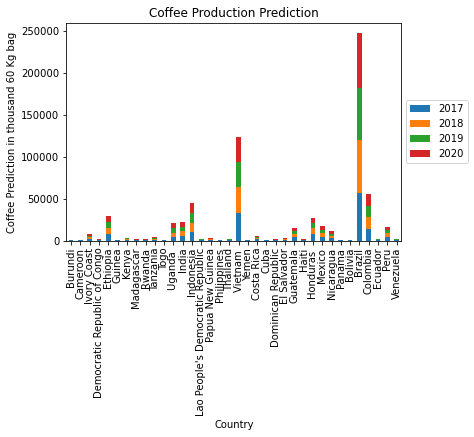

In [9]:
cprd_df1.plot(kind='bar', stacked =True, x='Country')
plt.title("Coffee Production Prediction")
plt.xlabel("Country")
plt.ylabel("Coffee Prediction in thousand 60 Kg bag")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = cprd_df1[["2017", "2018", "2019"]]
y = cprd_df1["2020"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(36, 3) (36, 1)


In [11]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
scaler=StandardScaler()
### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [14]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

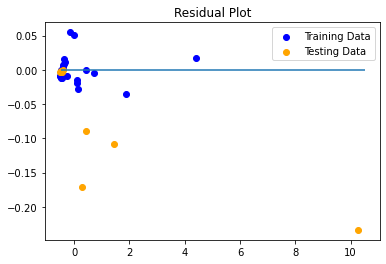

In [15]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictionslen = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [ ]:
# Creating graph for expected Vs Predicted graph
pyplot.plot(y, label='Expected')
pyplot.plot(predictionslen, label='Predicted')
pyplot.legend()
pyplot.show()


In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictionslen)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
predictionslen
predictionlen1=model.predict(X_train)
y_train
pd1=predictionlen1.astype(int)
y_train, pd1


In [ ]:
X_train2020= cprd_df1[["2018","2019","2020"]]
predictionlen2=model.predict(X_train2020).astype(int)



In [ ]:
cprd_df1

In [ ]:
cprd_df1.describe()

In [ ]:
cprd_df1[" 2021"]=predictionlen2
# cprd_df2.set_index('Country',inplace=True)
# cprd_df2.set_index("Country", inplace=True)

cprd_df1
# cprd_df1.reset_index()
# cprd_df1.set_index('Continent',inplace=True)

In [ ]:
dftocsv=cprd_df1.to_csv("Resources/new_coffee_prd_by_country.csv")

In [ ]:
# cprd_df1.plot(kind='bar', x="country", stacked =True)
# plt.title("Production Prediction")
# plt.xlabel("Country")
# plt.ylabel("Coffee Prediction in thousand 60 Kg bag")
plt.figure(figsize=(10,10))
cprd_df1.plot(kind='bar', stacked =True, x='Country')

plt.title("Coffee Production Prediction")
plt.xlabel("Country")
plt.ylabel("Coffee Prediction in thousand 60 Kg bag")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2021_coffee_prediction")

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

# elasticnet_df["MSE"]